In [19]:
import pandas as pd 
import urllib.parse
data_dir = './dependencies/wikispeedia_paths-and-graph/'
df = pd.read_csv(data_dir + 'articles.tsv', sep='\t', skiprows=12, header=None).squeeze()

In [20]:
for row in range(len(df)):
    df[row] =  urllib.parse.unquote(df[row])

list_of_names = df.tolist()

In [21]:
len(list_of_names)

4604

In [22]:
# Function to load the shortest path distance matrix from file
def load_distance_matrix(list_of_names, file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Assuming list_of_names contains the order of the nodes
    list_of_names = list_of_names
    # Create a dictionary to store the distances
    
    distance_matrix = {}
    for i, line in enumerate(lines):
        
        if i>16:
            idx = i-17
            distances = list(line)[:-1]  # Split the line based on underscores
            distances = [int(d) if d != '_' else -1 for d in distances]  # Convert to integers, -1 for unreachable
            distance_matrix[list_of_names[idx]] = distances
    return distance_matrix

# File path to shortest-path-distance-matrix.txt
file_path = data_dir + 'shortest-path-distance-matrix.txt'  # Update the file path accordingly

# Load the distance matrix
distance_matrix = load_distance_matrix(list_of_names, file_path)

# Now distance_matrix is a dictionary where keys are the entity names and values are lists of distances
# between that entity and other entities, as per the order defined in list_of_names.


In [23]:
import pandas as pd

# Assuming you have loaded the distance_matrix dictionary as shown previously

# Convert the dictionary to a DataFrame
distance_df = pd.DataFrame.from_dict(distance_matrix, orient='index', columns=list_of_names)

# Display the DataFrame
distance_df.head()


,Áedán_mac_Gabráin,Åland,Édouard_Manet,Éire,Óengus_I_of_the_Picts,€2_commemorative_coins,10th_century,11th_century,12th_century,13th_century,...,Ziad_Jarrah,Zimbabwe,Zinc,Zinc_chloride,Zion_National_Park,Zionism,Zirconium,Zoroaster,Zuid-Gelders,Zulu
Áedán_mac_Gabráin,0,-1,-1,-1,-1,-1,3,3,3,3,...,4,3,3,4,4,3,4,4,4,2.0
Åland,-1,0,-1,-1,-1,-1,2,2,2,2,...,4,2,3,4,4,3,4,3,3,3.0
Édouard_Manet,-1,-1,0,-1,-1,-1,3,3,2,2,...,4,3,2,3,4,3,4,3,3,3.0
Éire,-1,-1,-1,0,-1,-1,3,3,3,3,...,4,2,2,3,4,3,4,4,3,3.0
Óengus_I_of_the_Picts,-1,-1,-1,-1,0,-1,2,2,3,2,...,4,2,3,4,4,3,4,3,3,3.0


In [24]:
import pickle
with open('./Mistral_7B_Games/Mistral_Games.pickle', 'rb') as file:
    Mistral_Games = pickle.load(file)

In [35]:
dict_keys = list(Mistral_Games.keys())
first_entries = [entry.split('->')[0] for entry in dict_keys]
second_entries = [entry.split('->')[1] for entry in dict_keys]

In [39]:
 distance_df = distance_df.loc[first_entries, second_entries]

In [42]:
distance_df.head()

,Telephone,Zebra,Viking,Bean,Wood,Great_white_shark,The_Holocaust,Sun,Adolf_Hitler,Banana,...,Toy_Story,Odysseus,Sun,Baseball,Fidel_Castro,Whale,Meat,Beer,Bill_Clinton,Fruit
Brain,3,2,3,3,2,4,3,2,3,3,...,5,3,2,2,3,2,2,3,2,3
Theatre,3,3,2,3,3,4,2,3,2,3,...,5,3,3,2,3,3,3,3,3,3
Asteroid,3,3,3,3,3,4,3,1,3,3,...,4,2,1,3,3,3,3,3,3,2
Pyramid,3,3,2,3,2,4,3,1,2,3,...,5,2,1,2,3,3,3,2,3,2
Batman,3,3,3,4,3,5,3,2,3,4,...,5,4,2,3,4,3,3,3,3,3


In [50]:
# from the table above, extract the pair of games that have an optimal lenght path of 3 
# Assuming distance_df contains the DataFrame with shortest path distances

# Empty list to store pairs with optimal path length of 3
pairs_length_3 = []

# Iterate through the DataFrame to find pairs with optimal path length of 3
for i, source in enumerate(distance_df.index):
    for j, target in enumerate(distance_df.columns):
        if distance_df.iloc[i, j] == 3:
            pairs_length_3.append(f"{source}->{target}")


In [53]:
#3. Only games of between 3 and 8 clicks are shown
import os

# decode url text inside page names
def decode_list(url_encoded_list):
    """Decodes url_encoded path.
    
    Args:
        url_encoded_list (list): list of url_encoded page names
    
    Returns:
        list: list of decoded page names
    """
    return [urllib.parse.unquote(element).replace(',', '') for element in url_encoded_list]

# pull in finished games and prepare for append
human_fin = pd.read_csv(os.path.join(data_dir, 'paths_finished.tsv'), sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
human_fin['path_decoded'] = human_fin['path'].str.split(';').apply(decode_list)
human_fin['origin'] = human_fin['path_decoded'].str[0]
human_fin['goal'] = human_fin['path_decoded'].str[-1]
human_fin['finished'] = 1

# pull in unfinished games and prepare for append
human_unfin = pd.read_csv(os.path.join(data_dir, 'paths_unfinished.tsv'), sep='\t', skiprows=17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
human_unfin['path_decoded'] = human_unfin['path'].str.split(';').apply(decode_list)
human_unfin['origin'] = human_unfin['path_decoded'].str[0]
human_unfin = human_unfin.rename(columns={'target': 'goal'})
human_unfin['finished'] = 0

# append
human = pd.concat([human_fin, human_unfin])
human['game_pair'] = human['origin'] + "->" + human['goal']
human['player_type'] = "human"
human = human[['player_type'] + [col for col in list(human.columns) if col != 'player_type']]
human.head()

# intra game-pair and timestamp index (for global id later)
human.sort_values(by=['game_pair', 'timestamp'], inplace=True)
human['iteration'] = human.groupby('game_pair').cumcount()
human.head()

,player_type,hashedIpAddress,timestamp,durationInSec,path,rating,path_decoded,origin,goal,finished,type,game_pair,iteration
29758,human,516b61133d358ce1,1224623308,6,10th_century;11th_century,1.0,"[10th_century, 11th_century]",10th_century,11th_century,1,NaN,10th_century->11th_century,0
29759,human,6b039e9953cf075e,1241187124,3,10th_century;11th_century,5.0,"[10th_century, 11th_century]",10th_century,11th_century,1,NaN,10th_century->11th_century,1
29760,human,0aecf97906bcb41a,1373439892,4,10th_century;11th_century,1.0,"[10th_century, 11th_century]",10th_century,11th_century,1,NaN,10th_century->11th_century,2
29761,human,32652d6d1c5d9351,1260397548,48,10th_century;Maya_civilization;Silver;Coin;Ban...,3.0,"[10th_century, Maya_civilization, Silver, Coin...",10th_century,Banknote,1,NaN,10th_century->Banknote,0
29753,human,0d57c8c57d75e2f5,1296192247,15,10th_century;Germany;Country,1.0,"[10th_century, Germany, Country]",10th_century,Country,1,NaN,10th_century->Country,0


In [62]:
# Filter the 'human' DataFrame based on the combination_list
filtered_human = human[((human['origin'] + '->' + human['goal']).isin(pairs_length_3))  &
    (human['path'].str.split(';').apply(len).between(3, 8))]


In [64]:
# now find the outdegree for each page visited and add a column 

import urllib.parse
import pandas as pd


data_dir = './dependencies/wikispeedia_paths-and-graph/'

# extrapolating the link lists for a given wikipedia page:

# Dict of lists containing links
links = {}

df = pd.read_csv(data_dir + 'links.tsv', sep='\t', skiprows=12, header=None)

# Iterate over the dataframe rows
for index, row in df.iterrows():
    start_page = urllib.parse.unquote(row[0])
    link_page = urllib.parse.unquote(row[1])
    if start_page in links:
        links[start_page].append(link_page)
    else:
        links[start_page] = [link_page]

def get_outdegree(step: str) -> list:
    """Get links from wikipedia page

    Args:
        page_title (str): page title

    Returns:
        list: list of links from page
    """
    return len(links.get(step, []))


In [67]:
filtered_human['outdegree'] = filtered_human['path'].apply(lambda x: [get_outdegree(step) for step in x.split(';')])


/var/folders/qx/mbfp35d17jz5g1qfw4xsv3yc0000gn/T/ipykernel_2149/1279811410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_human['outdegree'] = filtered_human['path'].apply(lambda x: [get_outdegree(step) for step in x.split(';')])


In [68]:
filtered_human

,player_type,hashedIpAddress,timestamp,durationInSec,path,rating,path_decoded,origin,goal,finished,type,game_pair,iteration,outdegree
7,human,20418ff4797f96be,1229188046,139,14th_century;Time;Isaac_Newton;Light;Color;Rai...,1.0,"[14th_century, Time, Isaac_Newton, Light, Colo...",14th_century,Rainbow,1,NaN,14th_century->Rainbow,0,"[31, 42, 56, 55, 19, 25]"
8,human,08888b1b428dd90e,1232241510,74,14th_century;Time;Light;Rainbow,3.0,"[14th_century, Time, Light, Rainbow]",14th_century,Rainbow,1,NaN,14th_century->Rainbow,1,"[31, 42, 55, 25]"
9,human,08888b1b428dd90e,1232241601,167,14th_century;15th_century;Plato;Nature;Ultravi...,NaN,"[14th_century, 15th_century, Plato, Nature, Ul...",14th_century,Rainbow,1,NaN,14th_century->Rainbow,2,"[31, 57, 44, 69, 34, 19, 25]"
12,human,390ae528683f78ab,1250727252,66,14th_century;Time;Astronomy;Light;Rainbow,NaN,"[14th_century, Time, Astronomy, Light, Rainbow]",14th_century,Rainbow,1,NaN,14th_century->Rainbow,5,"[31, 42, 75, 55, 25]"
15,human,0d57c8c57d75e2f5,1290754816,43,14th_century;Renaissance;Leonardo_da_Vinci;Wat...,NaN,"[14th_century, Renaissance, Leonardo_da_Vinci,...",14th_century,Rainbow,1,NaN,14th_century->Rainbow,8,"[31, 63, 47, 131, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24786,human,7e031b983e19f1cf,1389560913,87,Theatre;Stage_%28theatre%29;Ancient_Greece,NaN,"[Theatre, Stage_(theatre), Ancient_Greece]",Theatre,Zebra,0,restart,Theatre->Zebra,1768,"[17, 0, 65]"
49240,human,7e031b983e19f1cf,1389561052,127,Theatre;Stage_%28theatre%29;Ancient_Rome;Horse...,NaN,"[Theatre, Stage_(theatre), Ancient_Rome, Horse...",Theatre,Zebra,1,NaN,Theatre->Zebra,1769,"[17, 0, 88, 65, 12]"
24794,human,30b304bf1e7b21c2,1389566221,169,Theatre;Opera;Spain;North_Africa;Africa;Giraff...,NaN,"[Theatre, Opera, Spain, North_Africa, Africa, ...",Theatre,Zebra,0,restart,Theatre->Zebra,1770,"[17, 37, 89, 33, 212, 30, 101]"
24808,human,28a534a13519d0a9,1389605512,1861,Theatre;Aristotle;Ancient_Greece;Egypt;Africa,NaN,"[Theatre, Aristotle, Ancient_Greece, Egypt, Af...",Theatre,Zebra,0,timeout,Theatre->Zebra,1771,"[17, 37, 65, 70, 212]"


In [97]:
filtered_human['path'].str.count(';')

7        5
8        3
9        6
12       4
15       4
        ..
24786    2
49240    4
24794    6
24808    4
24833    7
Name: path, Length: 6131, dtype: int64

In [102]:
filtered_mistral['path_decoded'].apply(len)

2       5
3       5
4       5
5       5
6       5
       ..
2467    6
2468    8
2469    7
2470    8
2472    5
Name: path_decoded, Length: 770, dtype: int64

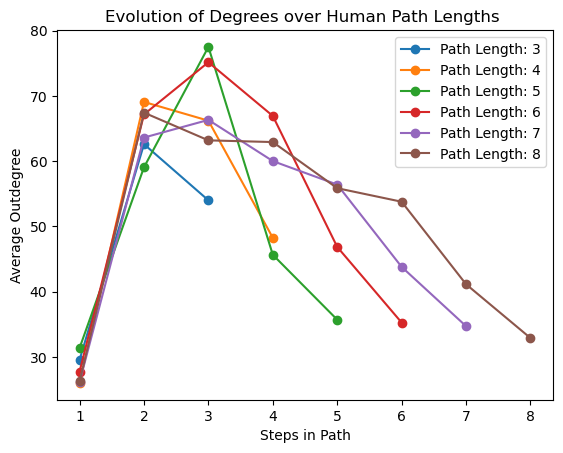

In [105]:
import matplotlib.pyplot as plt

# Assuming 'human' DataFrame contains the 'outdegree' column as described earlier

# Group the DataFrame by path length and aggregate the outdegrees
grouped = filtered_human.groupby(filtered_human['path'].str.count(';'))['outdegree'].apply(lambda x: [sum(degrees) / len(degrees) for degrees in zip(*x)]).reset_index(name='avg_outdegree')

# Plotting the evolution of degrees over the path lengths
for index, row in grouped.iterrows():
    plt.plot(range(1, len(row['avg_outdegree']) + 1), row['avg_outdegree'], label=f"Path Length: {row['path'] + 1}", marker='o')

plt.xlabel('Steps in Path')
plt.ylabel('Average Outdegree')
plt.title('Evolution of Degrees over Human Path Lengths ')
plt.legend()
plt.show()


In [80]:
# now let's see for mistral data

In [81]:
# open mistral data and cast as df via properly formatted nested list
with open('Mistral_7B_Games/Mistral_Games.pickle', 'rb') as file:
    mistral_nested_dict = pickle.load(file)
list_of_lists = []
for key in mistral_nested_dict:
    for i in range(len(mistral_nested_dict[key])):
        list_of_lists.append([key, mistral_nested_dict[key][f'rep{i}'], i])
mistral = pd.DataFrame(list_of_lists, columns=['game_pair', 'path_decoded', 'iteration'])

# conform to human data structure
mistral['origin'] = mistral['game_pair'].str.split("->").str[0]
mistral['goal'] = mistral['game_pair'].str.split("->").str[1]
mistral['finished'] = mistral.apply(lambda row: 1 if row['goal'] == row['path_decoded'][-1] else 0, axis=1)
mistral['path_decoded'] = mistral.apply(lambda row: [row['origin']] + row['path_decoded'], axis=1)
mistral['player_type'] = "mistral"
mistral = mistral[['player_type'] + [col for col in list(mistral.columns) if col != 'player_type']]
mistral.head()

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",4,Brain,Telephone,1


In [84]:
filtered_mistral = mistral[((mistral['origin'] + '->' + mistral['goal']).isin(pairs_length_3))  &
    (mistral['path_decoded'].apply(len).between(3, 8))]

In [87]:
filtered_mistral['outdegree'] = filtered_mistral['path_decoded'].apply(lambda x: [get_outdegree(step) for step in x])


/var/folders/qx/mbfp35d17jz5g1qfw4xsv3yc0000gn/T/ipykernel_2149/719495271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mistral['outdegree'] = filtered_mistral['path_decoded'].apply(lambda x: [get_outdegree(step) for step in x])


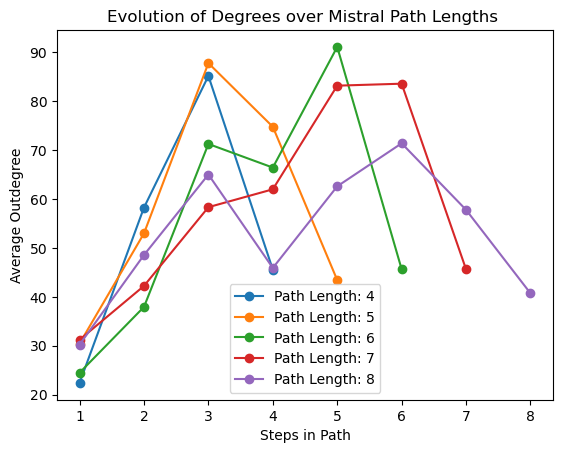

In [108]:
import matplotlib.pyplot as plt

# Assuming 'human' DataFrame contains the 'outdegree' column as described earlier

# Group the DataFrame by path length and aggregate the outdegrees
grouped = filtered_mistral.groupby(filtered_mistral['path_decoded'].apply(len))['outdegree'].apply(lambda x: [sum(degrees) / len(degrees) for degrees in zip(*x)]).reset_index(name='avg_outdegree')

# Plotting the evolution of degrees over the path lengths
for index, row in grouped.iterrows():
    plt.plot(range(1, len(row['avg_outdegree']) + 1), row['avg_outdegree'], label=f"Path Length: {row['path_decoded']}", marker='o')

plt.xlabel('Steps in Path')
plt.ylabel('Average Outdegree')
plt.title('Evolution of Degrees over Mistral Path Lengths ')
plt.legend()
plt.show()


In [ ]:
#### now let's work on a new graph 
